<a href="https://colab.research.google.com/github/Ibraheem101/mlops/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 100

In [3]:
np.random.seed(SEED)

In [4]:
# Generate data
def generate_data(n):
  X = np.linspace(0, 99, 100)
  random_noise = np.random.uniform(-10, 20, size = n)
  y = 5 * X + random_noise
  return X, y

In [5]:
X, y = generate_data(n = NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:10])

[[ 0.         -4.25441649]
 [ 1.         13.66326313]
 [ 2.         13.13183217]
 [ 3.         28.56075751]
 [ 4.         33.39927424]
 [ 5.         23.17777816]
 [ 6.         28.29392765]
 [ 7.         49.05616533]
 [ 8.         58.74418061]
 [ 9.         61.27797904]]


In [6]:
# Load into a dataframe
df = pd.DataFrame(data, columns = ['X', 'y'])
X = df.X.values
y = df.y.values

In [7]:
df.head()

,X,y
0,0.0,-4.254416
1,1.0,13.663263
2,2.0,13.131832
3,3.0,28.560758
4,4.0,33.399274


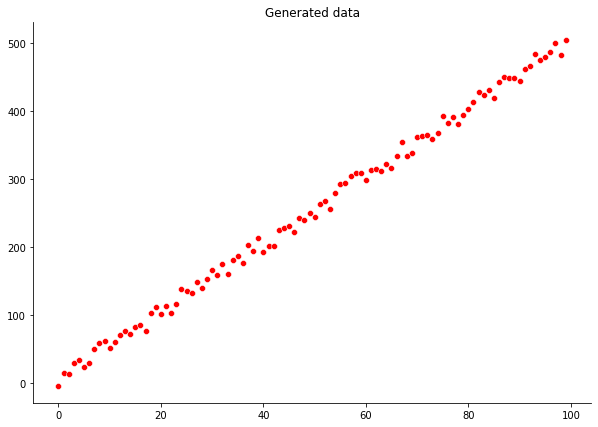

In [8]:
plt.figure(figsize = (10, 7))
plt.title("Generated data")
sns.scatterplot(data = df, x = X, y = y, color = 'r', )
sns.despine()

### Splitting Data

In [9]:
train_size = 0.7
test_size = 0.15
val_size = 0.15

In [10]:
indices = np.arange(NUM_SAMPLES)
np.random.shuffle(indices)

In [11]:
X = X[indices]
y = y[indices]

In [12]:
len(X[85:])

15

In [13]:
# X_train = X[:70]
# y_train = y[:70]

# X_test = X[70:85]
# y_test = y[70:85]

# X_val = X[85:]
# y_val = y[85:]

In [14]:
train_end = int(train_size * NUM_SAMPLES)
test_start = train_end
test_end = int((train_size + test_size)*NUM_SAMPLES)
val_start = test_end

print(f"Train end: {train_end}")
print(f"Test start: {test_start}")
print(f"Test end: {test_end}")

Train end: 70
Test start: 70
Test end: 85


In [15]:
X_train = X[:train_end]
y_train = y[:train_end]

X_test = X[test_start:test_end]
y_test = y[test_start:test_end]

X_val = X[val_start:]
y_val = y[val_start:]

In [16]:
print(len(X_train), len(X_test), len(X_val))

70 15 15


In [17]:
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")

X_train: (70,), y_train: (70,)
X_test: (15,), y_test: (15,)
X_val: (15,), y_test: (15,)


### Standardize Data

In [18]:
# Standardize to mean of zero and S.D of 1
def Standardize(data, mean, std):
  z = (data - mean)/std
  return z

In [19]:
# Fit on training data and transform on test and val data
X_mean = np.mean(X_train)
X_std = np.std(X_train)

y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [20]:
X_train_scaled = Standardize(X_train, X_mean, X_std)
y_train_scaled = Standardize(y_train, y_mean, y_std)

X_test_scaled = Standardize(X_test, X_mean, X_std)
y_test_scaled = Standardize(y_test, y_mean, y_std)

X_val_scaled = Standardize(X_val, X_mean, X_std)
y_val_scaled = Standardize(y_val, y_mean, y_std)

In [21]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test_scaled, axis=0):.1f}, std: {np.std(X_test_scaled, axis=0):.1f}")
print (f"mean: {np.mean(y_test_scaled, axis=0):.1f}, std: {np.std(y_test_scaled, axis=0):.1f}")

mean: -0.2, std: 1.0
mean: -0.2, std: 1.0


In [22]:
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1)
y_train_scaled = y_train_scaled.reshape(y_train_scaled.shape[0], 1)

X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1)
y_test_scaled = y_test_scaled.reshape(y_test_scaled.shape[0], 1)

X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 1)
y_val_scaled = y_val_scaled.reshape(y_val_scaled.shape[0], 1)

### Model Weights and biases

In [23]:
X_train_scaled.shape

(70, 1)

In [24]:
# Random initialization
# y_hat = W * X + b
w_row = X_train_scaled.shape[1]
w_col = y_train_scaled.shape[1]

W = 0.01 * np.random.randn(w_row, w_col)
b = np.zeros((1, 1)) #Numpy will expand it

print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [25]:
y_pred = np.dot(X_train_scaled, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (70, 1)


### Computing Loss
MSE

In [26]:
n = len(X_train_scaled)

def mse(y, y_pred, n = len(y)):
  """Returns the mse loss"""
  return np.sum(np.square(y - y_pred)) / (n)

In [27]:
dw = np.sum((y_train_scaled - y_pred) * X_train_scaled) / n
db = np.sum(y_train_scaled - y_pred) / n

In [28]:
# Update weights
lr = 0.01
W -= lr*dw
b -= lr*db

### Training

In [29]:
epochs = 200
losses = []
epoch_count = []
for epoch in range(epochs):
  y_pred = np.dot(X_train_scaled, W) + b
  loss = mse(y_train_scaled, y_pred)
  losses.append(loss)
  epoch_count.append(epoch)
  print (f"Epoch: {epoch}, loss: {loss:.3f}")

  dw = np.sum((y_train_scaled - y_pred) * X_train_scaled) * 2 / n
  db = np.sum(y_train_scaled - y_pred) * 2 / n

  W += lr*dw
  b += lr*db

Epoch: 0, loss: 0.741
Epoch: 1, loss: 0.712
Epoch: 2, loss: 0.684
Epoch: 3, loss: 0.657
Epoch: 4, loss: 0.631
Epoch: 5, loss: 0.606
Epoch: 6, loss: 0.582
Epoch: 7, loss: 0.559
Epoch: 8, loss: 0.537
Epoch: 9, loss: 0.516
Epoch: 10, loss: 0.496
Epoch: 11, loss: 0.476
Epoch: 12, loss: 0.457
Epoch: 13, loss: 0.439
Epoch: 14, loss: 0.422
Epoch: 15, loss: 0.405
Epoch: 16, loss: 0.389
Epoch: 17, loss: 0.374
Epoch: 18, loss: 0.359
Epoch: 19, loss: 0.345
Epoch: 20, loss: 0.332
Epoch: 21, loss: 0.319
Epoch: 22, loss: 0.306
Epoch: 23, loss: 0.294
Epoch: 24, loss: 0.283
Epoch: 25, loss: 0.271
Epoch: 26, loss: 0.261
Epoch: 27, loss: 0.251
Epoch: 28, loss: 0.241
Epoch: 29, loss: 0.231
Epoch: 30, loss: 0.222
Epoch: 31, loss: 0.214
Epoch: 32, loss: 0.205
Epoch: 33, loss: 0.197
Epoch: 34, loss: 0.189
Epoch: 35, loss: 0.182
Epoch: 36, loss: 0.175
Epoch: 37, loss: 0.168
Epoch: 38, loss: 0.162
Epoch: 39, loss: 0.155
Epoch: 40, loss: 0.149
Epoch: 41, loss: 0.143
Epoch: 42, loss: 0.138
Epoch: 43, loss: 0.13

In [30]:
val = np.dot(X_val_scaled, W) + b

In [31]:
np.vstack([[val, y_val_scaled]])

array([[[ 0.41094952],
        [-0.02439863],
        [ 0.24350792],
        [ 1.11420422],
        [ 0.3774612 ],
        [ 0.47792615],
        [-1.12951316],
        [-0.99555989],
        [-1.16300148],
        [ 0.84629767],
        [-1.39741972],
        [ 1.01373926],
        [ 1.04722758],
        [ 0.64536775],
        [ 0.87978598]],

       [[ 0.41419417],
        [-0.02544796],
        [ 0.34864266],
        [ 1.16293929],
        [ 0.41012088],
        [ 0.46295707],
        [-1.15439922],
        [-1.04592124],
        [-1.17668183],
        [ 0.94553874],
        [-1.33468159],
        [ 1.02154162],
        [ 1.09172743],
        [ 0.5800414 ],
        [ 0.88056212]]])

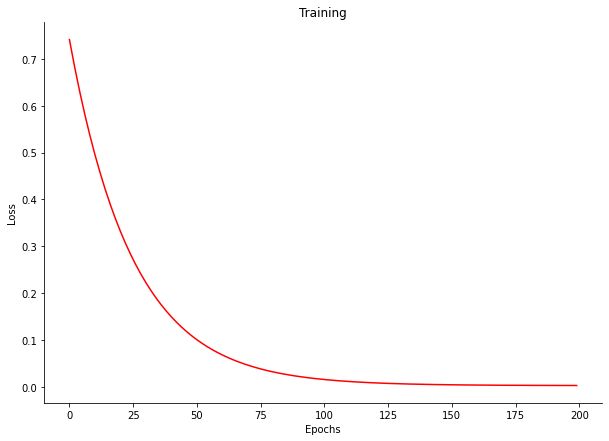

In [65]:
plt.figure(figsize = (10, 7))
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(x = epoch_count, y = losses, color = 'r')
sns.despine()

In [33]:
W

array([[0.98017482]])

In [34]:
b

array([[-1.72116289e-16]])

In [35]:
pred = np.dot(X_test_scaled, W) + b
np.vstack([[pred, y_test_scaled]])

array([[[ 0.2100196 ],
        [-0.82811829],
        [-0.39277014],
        [-0.6606767 ],
        [-1.09602484],
        [ 1.18118086],
        [-1.29695476],
        [-1.63183795],
        [-0.72765333],
        [ 1.31513413],
        [-0.45974678],
        [-0.4932351 ],
        [-0.76114165],
        [ 1.28164581],
        [ 1.24815749]],

       [[ 0.27305798],
        [-0.81605667],
        [-0.41425867],
        [-0.60030283],
        [-1.22062861],
        [ 1.13367428],
        [-1.32588467],
        [-1.64313756],
        [-0.7820934 ],
        [ 1.32973473],
        [-0.52852778],
        [-0.46302207],
        [-0.71943993],
        [ 1.33563603],
        [ 1.34192023]]])

### Evaluation

In [36]:
predictions = pd.DataFrame(X_test_scaled, columns = ['X'])
predictions['y'] = pred
predictions

,X,y
0,0.214267,0.210020
1,-0.844868,-0.828118
2,-0.400714,-0.392770
3,-0.674040,-0.660677
4,-1.118193,-1.096025
5,1.205072,1.181181
6,-1.323187,-1.296955
7,-1.664844,-1.631838
8,-0.742371,-0.727653
9,1.341734,1.315134


In [48]:
predictions.X.to_numpy().reshape(len(predictions.X), 1)

array([[ 0.21426749],
       [-0.84486795],
       [-0.40071438],
       [-0.67403965],
       [-1.11819322],
       [ 1.20507161],
       [-1.32318718],
       [-1.66484377],
       [-0.74237097],
       [ 1.34173425],
       [-0.46904569],
       [-0.50321135],
       [-0.77653663],
       [ 1.30756859],
       [ 1.27340293]])

In [57]:
# Convert numpy arrays to Pandas Series with an index
X_series = pd.Series(predictions.X, index=range(len(predictions.X)))
y_series = pd.Series(y_test_scaled.flatten(), index=range(len(y_test_scaled)))

# Use the Pandas Series as input to scatterplot function


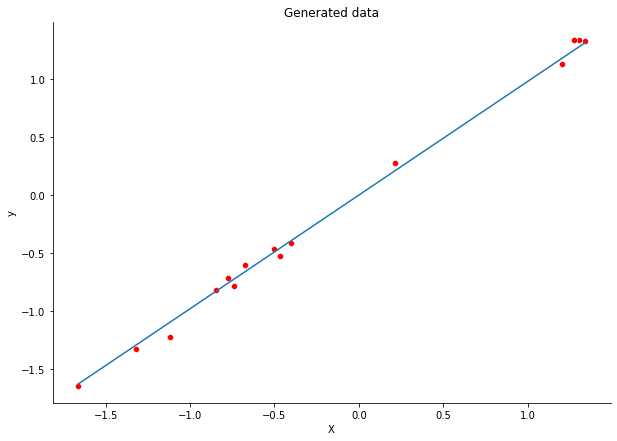

In [59]:
plt.figure(figsize = (10, 7))
plt.title("Generated data")
sns.lineplot(data = predictions, y = 'y', x = 'X')
sns.scatterplot(x=X_series, y=y_series, color='r')
sns.despine()

In [64]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled * X_mean)
print ("[actual] y = 5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0].round(2):}X + {b_unscaled[0]:}")


[actual] y = 5X + noise
[model] y_hat = 4.89X + [10.42037806]


Very close!

# Pytorch Implementation